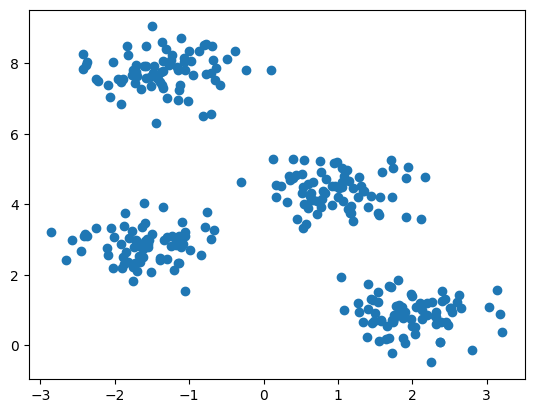

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn import metrics
import matplotlib.pyplot as plt

X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.50, random_state=0)
# sample visualization
plt.scatter(X[:, 0], X[:, 1], marker='o')
plt.show()


In [2]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.4, min_samples=10).fit(X)
# get clustered samples' mask without noise
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
# get number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)

# Plot result
# Black removed and is used for noise instead.
unique_labels = set(db.labels_)
unique_labels.remove(-1)

print('簇类个数为: ',n_clusters_)
print('unique_labels is ',unique_labels)

簇类个数为:  4
unique_labels is  {0, 1, 2, 3}


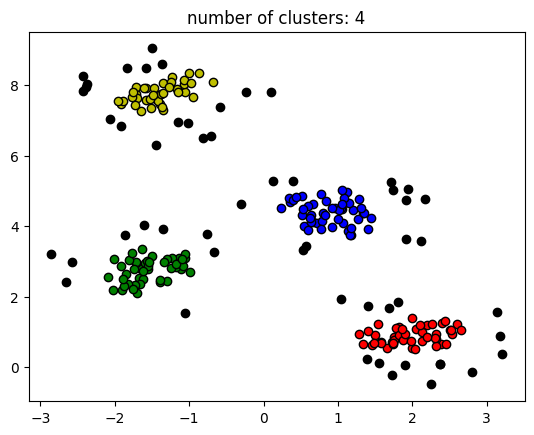

In [3]:
colors = ['y', 'b', 'g', 'r']

for k, col in zip(unique_labels, colors):
  
    class_member_mask = (db.labels_ == k)
  
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)

class_member_mask = (db.labels_ == -1)
xy = X[class_member_mask & ~core_samples_mask]
plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor='k',
         markeredgecolor='k',
         markersize=6)
  
plt.title('number of clusters: %d' % n_clusters_)
plt.show()

In [4]:
#evaluation metrics without noise
sc = metrics.silhouette_score(X[core_samples_mask], db.labels_[core_samples_mask])
print("Silhouette Coefficient:%0.2f"%sc)
ari = metrics.adjusted_rand_score(y_true[core_samples_mask], db.labels_[core_samples_mask])
print("Adjusted Rand Index: %0.2f"%ari)

Silhouette Coefficient:0.83
Adjusted Rand Index: 1.00
